In [1]:
#Loading Dataset 
#Importing pandas library
#Importing numpy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import statistics as st
import matplotlib.pyplot as pp
#reading the data
from google.colab import drive
drive.mount('/content/drive')

#reading the data
user_path = 'drive/MyDrive/Polygence_Naman/'
# os.listdir('')
mydata = pd.read_csv(user_path + 'data/cervical_cancer.csv')
mydata_copy = pd.read_csv(user_path + 'data/cervical_cancer.csv')
mydata_copy.shape

Mounted at /content/drive


(858, 36)

In [2]:
#Replace ? with Nan
mydata.replace("?", np.nan, inplace = True)

In [3]:
#Dropping any colomous over half of question mark
mydata.dropna(axis = 1, thresh = 858/2, inplace = True)
print(mydata.shape)

(858, 34)


In [4]:
#general overview of the data
mydata.head()

,Age,Number of sexual partners,First sexual intercourse,First sexual intercourse.1,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:

mydata.shape

(858, 34)

In [6]:
mydata.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#input data (x, regressor)
input_columns = mydata.columns[:-5]
x = np.array(mydata[input_columns])
x

array([[18, '4', '15', ..., 0, 0, 0],
       [15, '1', '14', ..., 0, 0, 0],
       [34, '1', nan, ..., 0, 0, 0],
       ...,
       [25, '2', '17', ..., 0, 0, 0],
       [33, '2', '24', ..., 0, 0, 0],
       [29, '2', '20', ..., 0, 0, 0]], dtype=object)

In [8]:
#The output data (y, predictor)
y = np.array(mydata["Biopsy"])

In [51]:
#Spilting the dataset 
# Stratified split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=5)
sss.get_n_splits(x, y)
for i, (train_index, test_index) in enumerate(sss.split(x, y)):
  

    x_train = x[train_index]
    y_train = y[train_index]

    x_test = x[test_index]
    y_test = y[test_index]
# Imputing the leftover data. 
imp_mean = SimpleImputer(missing_values=np.nan)
imp_mean = imp_mean.fit(x_train)
x_train = imp_mean.transform(x_train)
x_test = imp_mean.transform(x_test)

In [52]:
print(y.sum()/len(y))
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

0.0641025641025641
0.0641399416909621
0.06395348837209303


In [53]:
#featuring scale
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(x_train, y_train)
y_pred_svm = model_SVC.decision_function(x_test)

In [54]:
stndrd=StandardScaler()
x_train = stndrd.fit_transform(x_train)
x_test = stndrd.transform(x_test)

In [55]:
#Logistic Classifier
# model_logistic = LogisticRegression() 
model_logistic = LogisticRegression(max_iter=int(1e5), tol=1e-5, class_weight='balanced')
model_logistic.fit(x_train,y_train)
y_pred_logistic = model_logistic.predict_proba(x_test)[:,1]

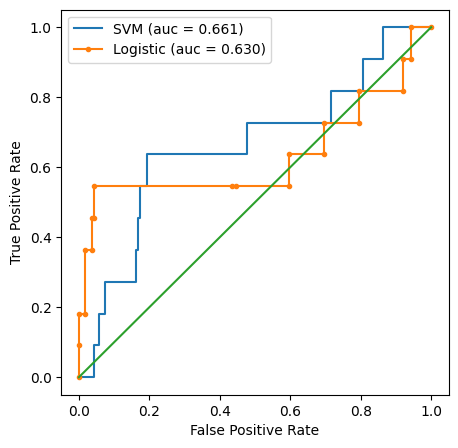

In [56]:
#ploting/graphing the ROC and comparing AUC
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot([0,1], [0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

In [57]:
# Figuring out the mean 
average_scores = [0.688, 0.489, 0.781, 0.652, 0.630, 0.532, 0.658, 0.449, 0.586, 0.603]
np.mean(average_scores)

0.6068

In [58]:
# This is going to be the standered diviation value
np.std(average_scores)

0.09325320369831805

In [59]:
model_logistic.coef_

array([[ 1.25266038e-03, -1.86133101e-01, -1.44517331e-01,
         1.56656580e-01, -1.06339416e-02,  1.90416587e-01,
        -7.70272743e-02, -2.68655764e-02,  3.27771753e-01,
        -1.79930455e-02,  1.04777543e-01,  8.77725916e-01,
        -6.31657675e-01,  7.36247460e-02,  0.00000000e+00,
        -9.35037782e-01,  1.58171135e-01, -1.70076911e+00,
        -4.67160954e-01,  1.77471840e-01, -4.67098465e-01,
         0.00000000e+00, -4.79802931e-03, -4.66359731e-01,
        -4.68570837e-01, -1.68812511e-02,  1.21979347e-01,
         1.61863618e-01,  1.26194906e-01]])

In [60]:
np.abs(model_logistic.coef_)
np.argsort(np.abs(model_logistic.coef_))

array([[14, 21,  0, 22,  4, 25,  9,  7, 13,  6, 10, 26, 28,  2,  3, 16,
        27, 19,  1,  5,  8, 23, 20, 18, 24, 12, 11, 15, 17]])